<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_4/Lesson_2/4.2.3%20Other%20Clustering%20Methods_drill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Other Clustering Methods Drill
Unit 4 / Lesson 2 / Project 3

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

There are a *lot* of different clustering methods – we're going to review just three more here: _Mean-shift_, _Spectral Clustering_, and _Affinity Propagation_.
If you want to go even broader, check out this [comparison among all the clustering algorithms available in sklearn](http://scikit-learn.org/stable/modules/clustering.html).

For all three methods, we'll be using the same simulated dataset, with three "blobs."
We won't need to normalize the data since it is simulated and comes pre-normalized, but with real data normalization will be important to make sure all your features are given equal weight in finding a clustering solution.

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

## Define data

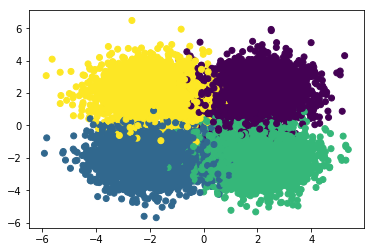

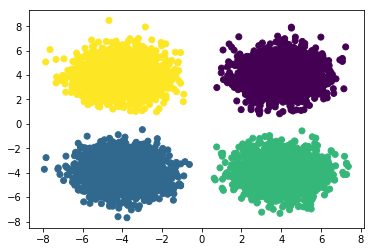

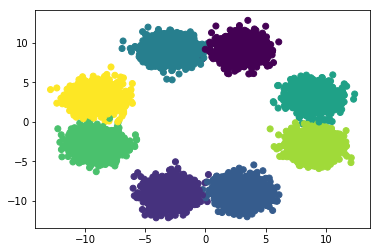

In [0]:
# The coordinates of the centers of our blobs.
centers = []
centers.append([[2, 2], [-2, -2], [2, -2], [-2, 2]])
centers.append([[4, 4], [-4, -4], [4, -4], [-4, 4]])
centers.append([[3, 9], [-3, -9], [3, -9], [-3, 9],
               [9,3], [-9,-3], [9,-3], [-9,3]])

for i in centers:
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=i,
        cluster_std=1,
        n_features=2,
        random_state=42)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

## Mean-shift

Number of estimated clusters: 4


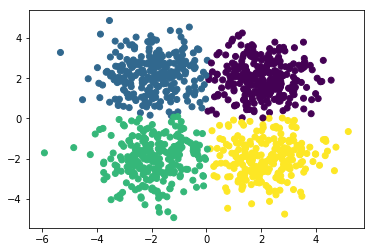

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0
Number of estimated clusters: 4


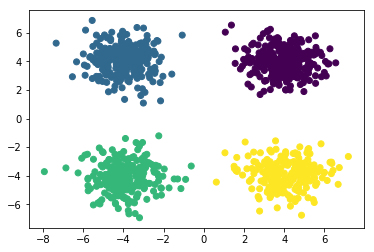

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0
Number of estimated clusters: 7


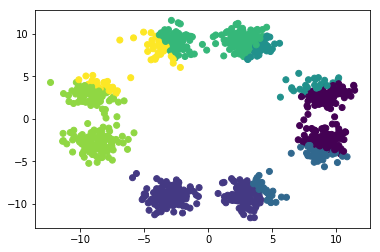

Comparing the assigned categories to the ones in the data:
col_0    0    1   2   3    4    5   6
row_0                                
0        0    0   0  28  110    0   0
1        0  135   0   0    0    0   0
2        0   99  30   0    0    0   0
3        0    0   0   0   74    0  36
4       98    0   0  26    0    0   0
5        0    0   0   0    0  114   0
6      101    0  39   0    0    0   0
7        0    0   0   0    0   81  29


In [0]:
n_clusters_list = []

for i in centers:
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=i,
        cluster_std=1,
        n_features=2,
        random_state=42)
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
    
    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))
    n_clusters_list.append(n_clusters_)
    
    print("Number of estimated clusters: {}".format(n_clusters_))
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

## Spectral clustering

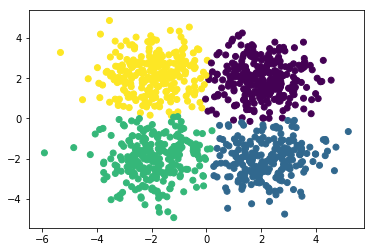

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      263    2    0    8
1        0    6  228    5
2        5  222   11    0
3        3    0    8  239


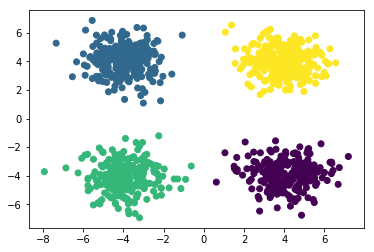

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0    0  273
1        0    0  239    0
2      238    0    0    0
3        0  250    0    0


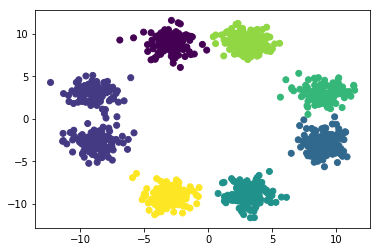

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0    0    0    0    0  138    0
1        0    0    0    0    0    0  135
2        0    0    0  129    0    0    0
3      109    0    0    0    0    1    0
4        0    0    1    0  123    0    0
5        0  114    0    0    0    0    0
6        0    0  140    0    0    0    0
7        0  110    0    0    0    0    0


In [0]:
idx = 0

for i in centers:
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=i,
        cluster_std=1,
        n_features=2,
        random_state=42)
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)

    # We know we're looking for three clusters.
    n_clusters=n_clusters_list[idx]
    idx += 1

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))

## Affinity propagation

In [0]:
n_clusters_list = []

for i in centers:
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=i,
        cluster_std=1,
        n_features=2,
        random_state=42)
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    
    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    n_clusters_list.append(n_clusters_)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25
Done
Estimated number of clusters: 51
Done
Estimated number of clusters: 8


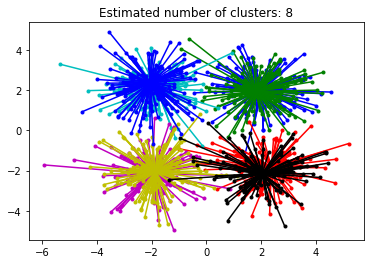

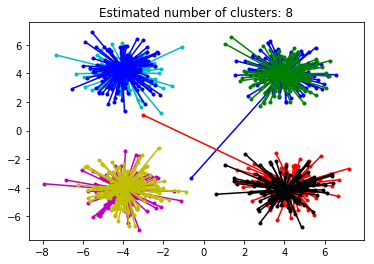

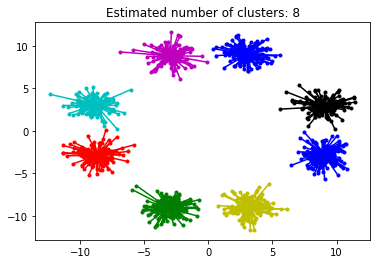

In [0]:
idx=0

for i in centers:
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=i,
        cluster_std=1,
        n_features=2,
        random_state=42)
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    
    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()